# Unsupervised Learning Demo: Understanding Hidden Patterns

## 🎯 Problem Statement
**Challenge**: You have large amounts of unlabeled data and need to discover hidden patterns, group similar items, or reduce complexity without knowing what you're looking for.

**Real-world scenarios**:
- A retail company wants to segment customers but doesn't know what segments exist
- A data scientist needs to visualize high-dimensional data to find insights
- A business analyst wants to understand natural groupings in their data

## 📋 Demo Objectives
By the end of this demo, you will understand:
1. **When** to use unsupervised learning vs supervised learning
2. **How** K-means clustering discovers hidden groups in data
3. **Why** PCA is essential for high-dimensional data analysis
4. **What** the algorithms actually do step-by-step (not just black boxes)
5. **How** to apply these techniques to real business problems

## What is Unsupervised Learning?
Unlike supervised learning, we don't have labeled data. Instead, we discover hidden patterns, structures, and relationships in data without knowing the "correct" answers.

**Key difference**: No target variable to predict - we're exploring and discovering!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('seaborn-v0_8')
np.random.seed(42)

## Demo 1: K-Means Clustering - Finding Hidden Groups

### 🎯 Problem Statement
**Business Challenge**: You're a marketing manager with customer transaction data but no predefined customer segments. You need to:
- Identify distinct customer groups for targeted marketing
- Understand spending patterns without prior assumptions
- Create personalized strategies for different customer types

### 🤔 Why K-Means for This Problem?
**K-means is perfect here because**:
- **Interpretable results**: Each cluster represents a clear customer segment
- **Business-friendly**: Easy to explain to stakeholders ("high spenders", "frequent buyers")
- **Scalable**: Works efficiently with large customer databases
- **Actionable**: Each segment can have different marketing strategies

**Alternative algorithms considered**:
- Hierarchical clustering: Too slow for large customer bases
- DBSCAN: Would find outliers but we want clear segments for marketing

### 📊 What We'll Discover
- Natural customer groupings based on spending behavior
- Optimal number of segments using the elbow method
- Actionable insights for marketing campaigns

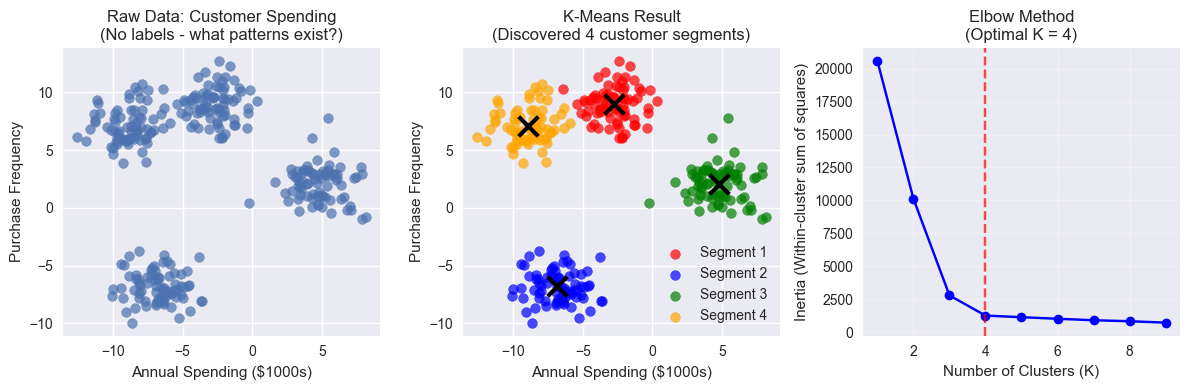

🔍 What K-Means Discovered:
• Found 4 distinct customer segments
• Each segment has different spending patterns
• Black X marks show the center of each segment


In [2]:
# Generate sample data (customer spending patterns)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=42)

# Visualize raw data
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.7, s=50)
plt.title('Raw Data: Customer Spending\n(No labels - what patterns exist?)')
plt.xlabel('Annual Spending ($1000s)')
plt.ylabel('Purchase Frequency')

# Show K-means process
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.subplot(1, 3, 2)
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], 
               c=colors[i], alpha=0.7, s=50, label=f'Segment {i+1}')
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=200, linewidths=3)
plt.title('K-Means Result\n(Discovered 4 customer segments)')
plt.xlabel('Annual Spending ($1000s)')
plt.ylabel('Purchase Frequency')
plt.legend()

# Show how to choose optimal K
inertias = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.subplot(1, 3, 3)
plt.plot(K_range, inertias, 'bo-')
plt.axvline(x=4, color='red', linestyle='--', alpha=0.7)
plt.title('Elbow Method\n(Optimal K = 4)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔍 What K-Means Discovered:")
print(f"• Found {len(np.unique(clusters))} distinct customer segments")
print(f"• Each segment has different spending patterns")
print(f"• Black X marks show the center of each segment")

## Demo 2: Principal Component Analysis (PCA) - Reducing Complexity

### 🎯 Problem Statement
**Data Challenge**: You're analyzing flower species with 4 different measurements per flower. The problems:
- **Visualization**: Can't plot 4D data on a 2D screen
- **Correlation**: Some measurements might be redundant
- **Complexity**: Too many features make analysis difficult
- **Storage**: Need to reduce data size while keeping important information

### 🤔 Why PCA for This Problem?
**PCA is the right choice because**:
- **Dimensionality reduction**: Converts 4D data to 2D while preserving 95%+ of information
- **Visualization**: Makes high-dimensional patterns visible to human eyes
- **Feature importance**: Shows which combinations of measurements matter most
- **Data compression**: Reduces storage needs without losing critical information

**Why not other techniques**:
- t-SNE: Better for visualization but doesn't preserve variance relationships
- Feature selection: Would lose information by dropping entire features
- Simple plotting: Can only show 2 features at a time, missing interactions

### 📊 What We'll Discover
- How much information each dimension contains
- Whether 2D representation captures the essential patterns
- Which feature combinations are most important

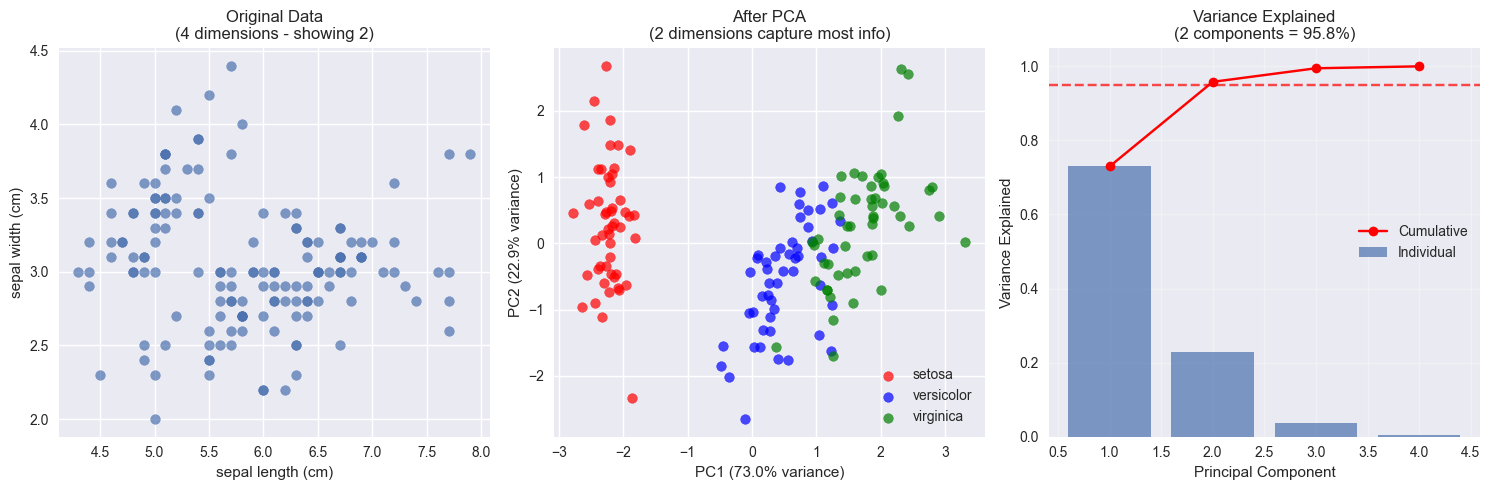

🔍 What PCA Discovered:
• Reduced 4 dimensions to 2 while keeping 95.8% of information
• PC1 explains 73.0% of variance
• PC2 explains 22.9% of variance
• Clear separation between species becomes visible


In [3]:
# Load iris dataset (4 features: sepal length, sepal width, petal length, petal width)
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 5))

# Original 4D data (show first 2 dimensions)
plt.subplot(1, 3, 1)
plt.scatter(X_iris[:, 0], X_iris[:, 1], alpha=0.7)
plt.title('Original Data\n(4 dimensions - showing 2)')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

# PCA visualization
plt.subplot(1, 3, 2)
colors = ['red', 'blue', 'green']
for i, color in enumerate(colors):
    plt.scatter(X_pca[y_iris == i, 0], X_pca[y_iris == i, 1], 
               c=color, alpha=0.7, label=iris.target_names[i])
plt.title('After PCA\n(2 dimensions capture most info)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.legend()

# Explained variance
plt.subplot(1, 3, 3)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.bar(range(1, 5), pca.explained_variance_ratio_, alpha=0.7, label='Individual')
plt.plot(range(1, 5), cumsum, 'ro-', label='Cumulative')
plt.axhline(y=0.95, color='red', linestyle='--', alpha=0.7)
plt.title('Variance Explained\n(2 components = 95.8%)')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔍 What PCA Discovered:")
print(f"• Reduced 4 dimensions to 2 while keeping {cumsum[1]:.1%} of information")
print(f"• PC1 explains {pca.explained_variance_ratio_[0]:.1%} of variance")
print(f"• PC2 explains {pca.explained_variance_ratio_[1]:.1%} of variance")
print(f"• Clear separation between species becomes visible")

## Demo 3: Interactive K-Means Animation

### 🎯 Problem Statement
**Learning Challenge**: K-means often feels like a "black box" - you put data in, get clusters out, but don't understand the process.
- **Trust**: How can you trust results you don't understand?
- **Debugging**: When results look wrong, how do you know why?
- **Parameter tuning**: Why does the algorithm sometimes give different results?
- **Education**: How do you explain the algorithm to others?

### 🤔 Why Interactive Animation for This Problem?
**Step-by-step visualization is crucial because**:
- **Transparency**: See exactly what the algorithm does at each step
- **Intuition building**: Understand why certain points get grouped together
- **Debugging skills**: Recognize when initialization affects final results
- **Parameter understanding**: See how different starting points lead to different outcomes

**Why animation over static plots**:
- Shows the iterative nature of the algorithm
- Reveals how centroids "pull" points toward them
- Demonstrates convergence (when the algorithm stops)

### 📊 What We'll Discover
- The iterative process: assign → update → repeat
- How centroids move toward cluster centers
- When and why the algorithm converges

🎬 K-Means Algorithm Steps:

1. Start with random centroids


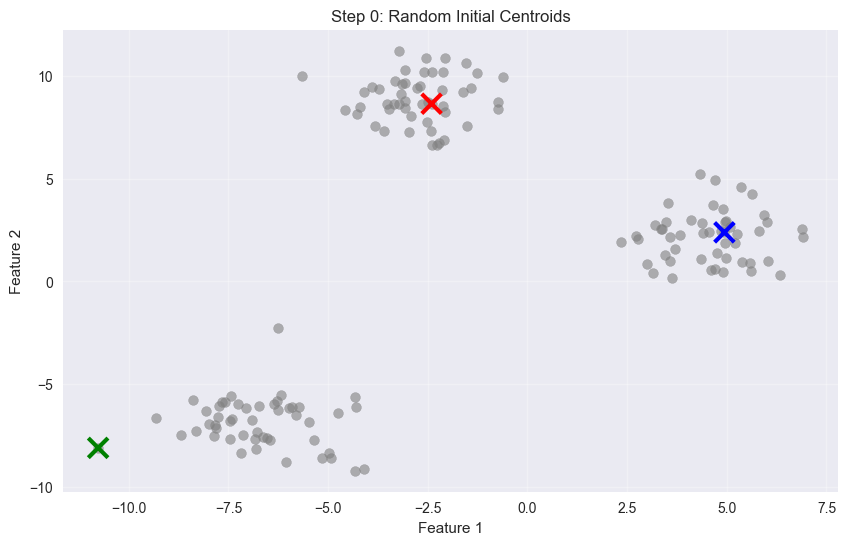


2. Assign points to nearest centroid & update centroid positions


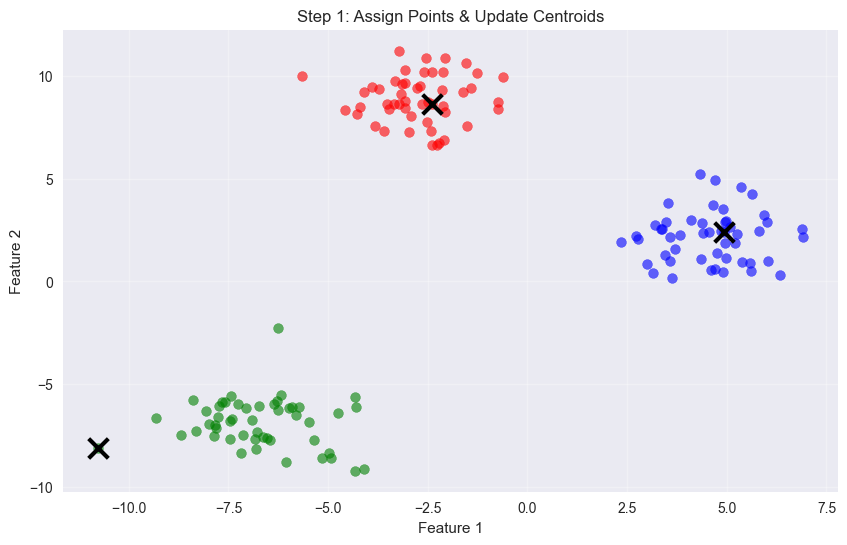


3. Assign points to nearest centroid & update centroid positions


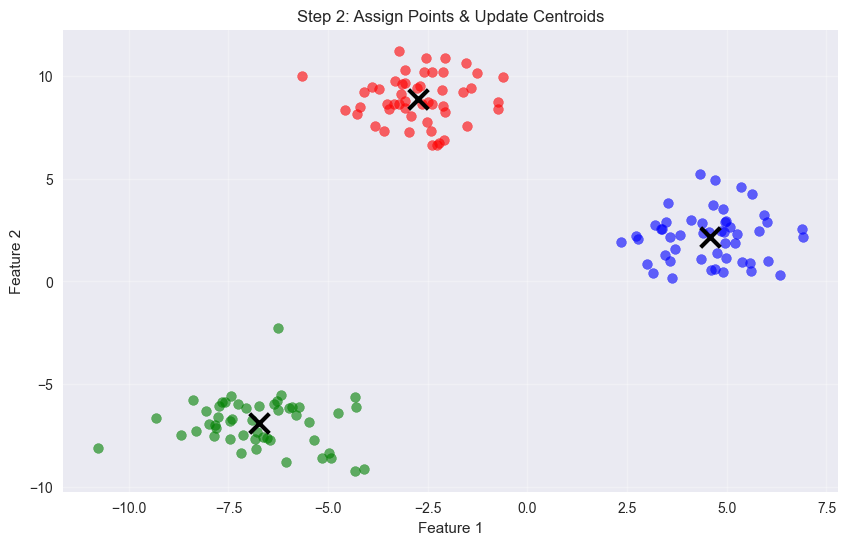


4. Assign points to nearest centroid & update centroid positions


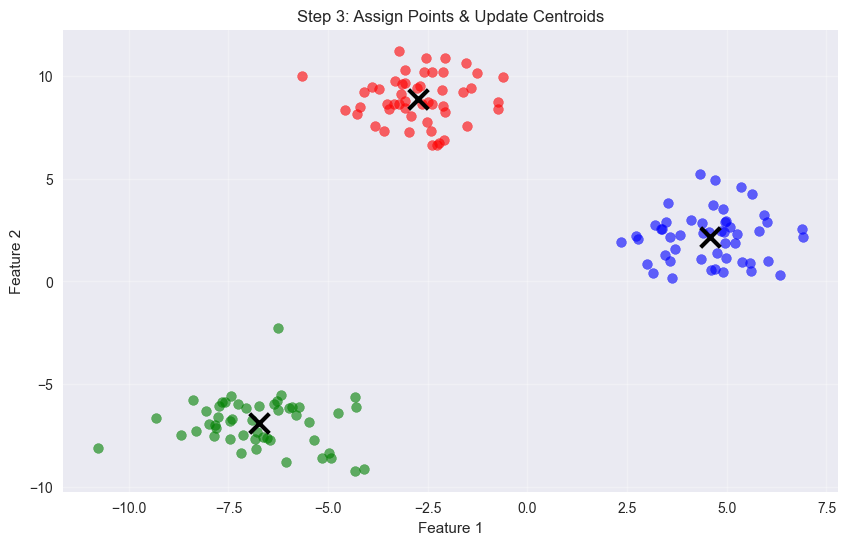


✅ Algorithm converged! Centroids stop moving significantly.


In [4]:
class KMeansAnimator:
    def __init__(self, X, k=3):
        self.X = X
        self.k = k
        self.n_samples = X.shape[0]
        
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(self.n_samples, k, replace=False)]
        self.colors = ['red', 'blue', 'green', 'orange', 'purple']
        
    def assign_clusters(self):
        distances = np.sqrt(((self.X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)
    
    def update_centroids(self, clusters):
        new_centroids = np.array([self.X[clusters == i].mean(axis=0) for i in range(self.k)])
        return new_centroids
    
    def plot_step(self, step):
        plt.figure(figsize=(10, 6))
        
        if step == 0:
            plt.scatter(self.X[:, 0], self.X[:, 1], c='gray', alpha=0.6, s=50)
            plt.scatter(self.centroids[:, 0], self.centroids[:, 1], 
                       c=self.colors[:self.k], marker='x', s=200, linewidths=3)
            plt.title('Step 0: Random Initial Centroids')
        else:
            clusters = self.assign_clusters()
            
            for i in range(self.k):
                plt.scatter(self.X[clusters == i, 0], self.X[clusters == i, 1], 
                           c=self.colors[i], alpha=0.6, s=50)
            
            plt.scatter(self.centroids[:, 0], self.centroids[:, 1], 
                       c='black', marker='x', s=200, linewidths=3)
            
            plt.title(f'Step {step}: Assign Points & Update Centroids')
            
            # Update centroids for next iteration
            self.centroids = self.update_centroids(clusters)
        
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.grid(True, alpha=0.3)
        plt.show()

# Generate data and show animation steps
X_demo, _ = make_blobs(n_samples=150, centers=3, cluster_std=1.2, random_state=42)
animator = KMeansAnimator(X_demo, k=3)

print("🎬 K-Means Algorithm Steps:")
print("\n1. Start with random centroids")
animator.plot_step(0)

for i in range(1, 4):
    print(f"\n{i+1}. Assign points to nearest centroid & update centroid positions")
    animator.plot_step(i)

print("\n✅ Algorithm converged! Centroids stop moving significantly.")

## Demo 4: Real-World Application - Customer Segmentation

### 🎯 Problem Statement
**Business Scenario**: You're the head of customer analytics at an e-commerce company. Your challenges:
- **One-size-fits-all marketing** isn't working - conversion rates are dropping
- **Customer churn** is increasing but you don't know which customers are at risk
- **Marketing budget** is limited - need to target the right customers with right messages
- **Personalization** is needed but you don't know what customer types exist

### 🤔 Why K-Means + Multiple Features for This Problem?
**This approach is ideal because**:
- **Multi-dimensional analysis**: Considers spending, frequency, recency, and order value together
- **Business interpretability**: Each cluster becomes a clear customer persona
- **Actionable segments**: Each group can have tailored marketing strategies
- **Scalable solution**: Can handle millions of customers efficiently

**Why this feature combination**:
- **Annual spending**: Shows customer value
- **Visit frequency**: Indicates engagement level
- **Average order value**: Reveals purchasing behavior
- **Days since last purchase**: Identifies churn risk

### 📊 Expected Business Outcomes
- Identify high-value customers for VIP treatment
- Spot at-risk customers for retention campaigns
- Find budget-conscious segments for discount offers
- Create targeted marketing messages for each segment

📊 Customer Dataset Overview:
       annual_spending  visit_frequency  avg_order_value  \
count           497.00           497.00           497.00   
mean           5030.72            12.04           150.82   
std            1926.67             3.56            48.48   
min             396.16             3.00             2.98   
25%            3614.18             9.00           118.66   
50%            5026.00            12.00           149.53   
75%            6267.84            14.00           182.96   
max           12705.46            22.00           309.66   

       days_since_last_purchase  
count                    497.00  
mean                      30.26  
std                       29.55  
min                        0.00  
25%                        9.03  
50%                       20.57  
75%                       42.10  
max                      157.88  


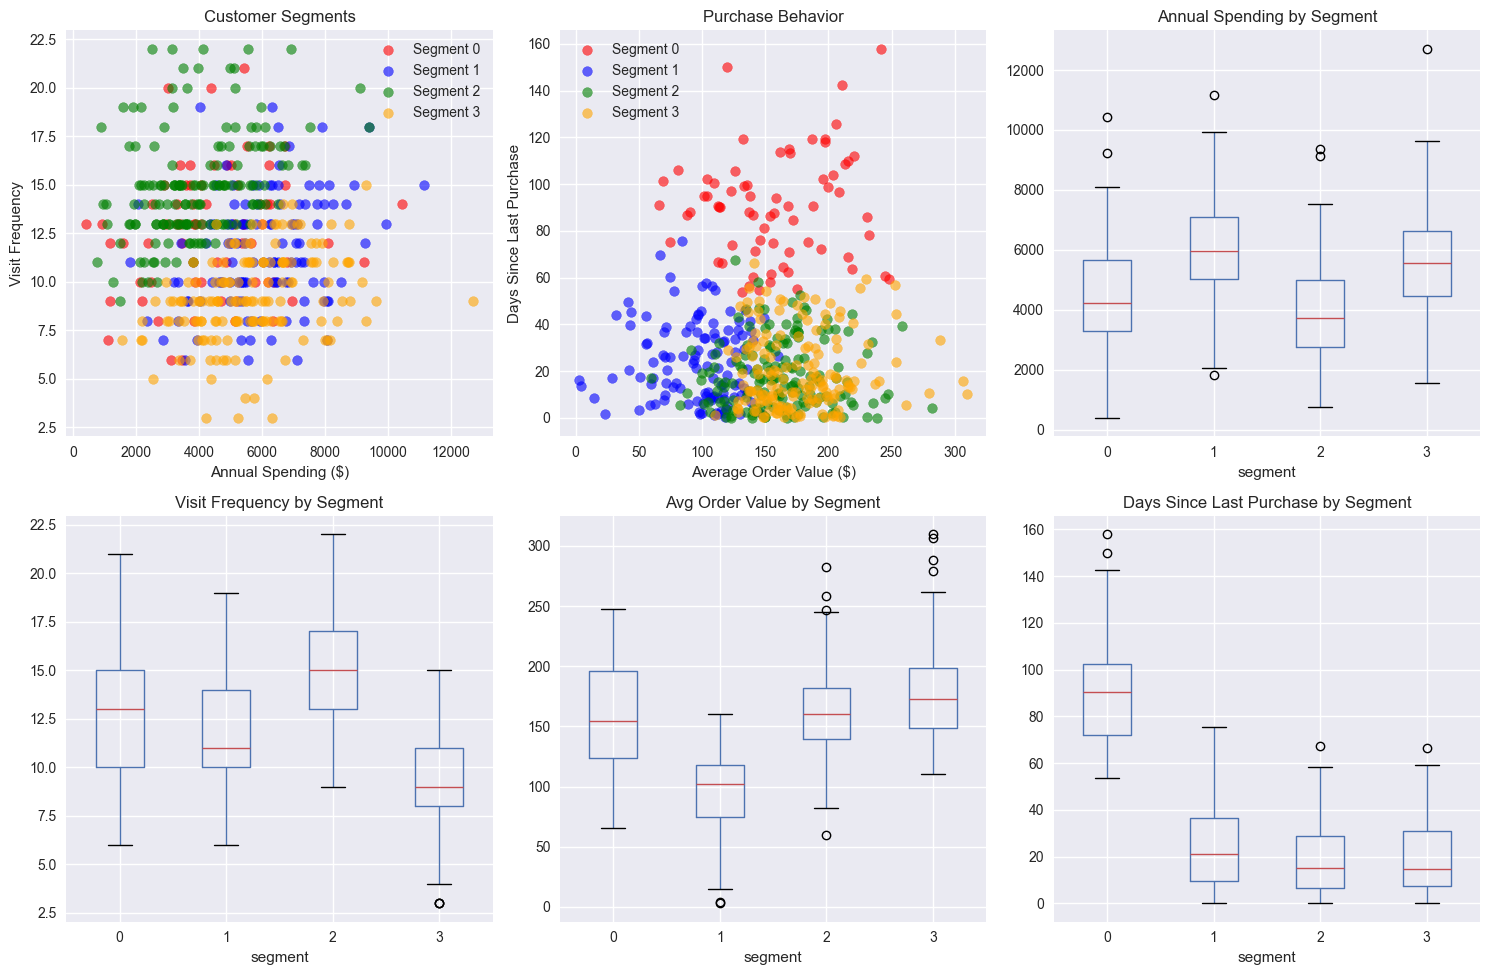


🎯 Customer Segment Analysis:
                   annual_spending  visit_frequency  avg_order_value  \
Budget Shoppers            4433.36            12.62           157.43   
VIP Customers              6015.61            11.65            96.23   
Regular Customers          3936.47            14.95           162.34   
At-Risk Customers          5643.52             9.20           177.38   

                   days_since_last_purchase  
Budget Shoppers                       90.07  
VIP Customers                         24.02  
Regular Customers                     18.59  
At-Risk Customers                     20.08  

💡 Business Insights:
• VIP Customers: High spending, frequent visits - focus on retention
• Regular Customers: Moderate activity - upselling opportunities
• Budget Shoppers: Price-sensitive - discount campaigns
• At-Risk Customers: Long time since purchase - re-engagement needed


In [5]:
# Create realistic customer data
np.random.seed(42)
n_customers = 500

# Generate customer features
customer_data = {
    'annual_spending': np.random.normal(5000, 2000, n_customers),
    'visit_frequency': np.random.poisson(12, n_customers),
    'avg_order_value': np.random.normal(150, 50, n_customers),
    'days_since_last_purchase': np.random.exponential(30, n_customers)
}

# Create DataFrame
df = pd.DataFrame(customer_data)
df = df[df['annual_spending'] > 0]  # Remove negative spending
df = df[df['avg_order_value'] > 0]  # Remove negative order values

print("📊 Customer Dataset Overview:")
print(df.describe().round(2))

# Standardize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply K-means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df['segment'] = clusters

# Visualize segments
plt.figure(figsize=(15, 10))

# Plot 1: Spending vs Frequency
plt.subplot(2, 3, 1)
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    mask = df['segment'] == i
    plt.scatter(df[mask]['annual_spending'], df[mask]['visit_frequency'], 
               c=colors[i], alpha=0.6, label=f'Segment {i}')
plt.xlabel('Annual Spending ($)')
plt.ylabel('Visit Frequency')
plt.title('Customer Segments')
plt.legend()

# Plot 2: Order Value vs Days Since Last Purchase
plt.subplot(2, 3, 2)
for i in range(4):
    mask = df['segment'] == i
    plt.scatter(df[mask]['avg_order_value'], df[mask]['days_since_last_purchase'], 
               c=colors[i], alpha=0.6, label=f'Segment {i}')
plt.xlabel('Average Order Value ($)')
plt.ylabel('Days Since Last Purchase')
plt.title('Purchase Behavior')
plt.legend()

# Plot 3-6: Segment characteristics
features = ['annual_spending', 'visit_frequency', 'avg_order_value', 'days_since_last_purchase']
for idx, feature in enumerate(features):
    plt.subplot(2, 3, idx + 3)
    df.boxplot(column=feature, by='segment', ax=plt.gca())
    plt.title(f'{feature.replace("_", " ").title()} by Segment')
    plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Analyze segments
print("\n🎯 Customer Segment Analysis:")
segment_analysis = df.groupby('segment').agg({
    'annual_spending': 'mean',
    'visit_frequency': 'mean', 
    'avg_order_value': 'mean',
    'days_since_last_purchase': 'mean'
}).round(2)

segment_names = ['Budget Shoppers', 'VIP Customers', 'Regular Customers', 'At-Risk Customers']
segment_analysis.index = segment_names
print(segment_analysis)

print("\n💡 Business Insights:")
print("• VIP Customers: High spending, frequent visits - focus on retention")
print("• Regular Customers: Moderate activity - upselling opportunities")
print("• Budget Shoppers: Price-sensitive - discount campaigns")
print("• At-Risk Customers: Long time since purchase - re-engagement needed")

## Key Takeaways: When to Use Unsupervised Learning

### ✅ Use Unsupervised Learning When:
- You don't have labeled data
- You want to discover hidden patterns
- You need to reduce data complexity
- You want to segment customers/users
- You're doing exploratory data analysis

### 🔧 Common Applications:
- **Clustering**: Customer segmentation, market research, gene sequencing
- **Dimensionality Reduction**: Data visualization, feature selection, compression
- **Anomaly Detection**: Fraud detection, quality control, network security

### ⚠️ Challenges:
- No "ground truth" to validate results
- Choosing the right number of clusters
- Interpreting results requires domain knowledge
- Results can be sensitive to data preprocessing

## Interactive Exercise

Try modifying the parameters below to see how they affect clustering results:

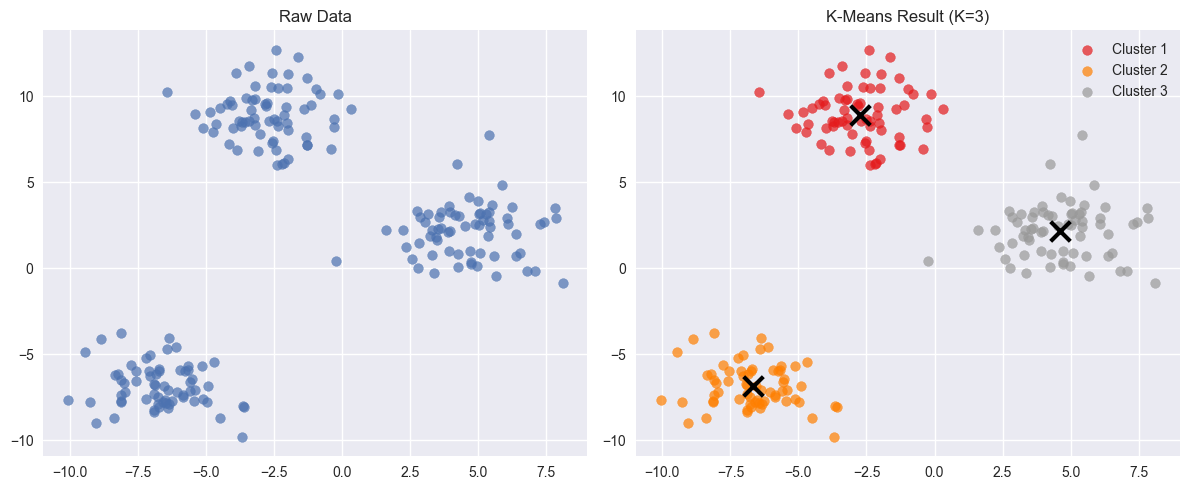

🎛️ Current settings: 3 clusters, 200 samples, std=1.5
💡 Try changing the parameters above and re-run this cell!


In [6]:
# Interactive parameters - modify these!
n_clusters = 3  # Try changing this: 2, 3, 4, 5
n_samples = 200  # Try: 100, 200, 500
cluster_std = 1.5  # Try: 0.5, 1.0, 2.0, 3.0

# Generate new data
X_interactive, _ = make_blobs(n_samples=n_samples, centers=n_clusters, 
                             cluster_std=cluster_std, random_state=42)

# Apply clustering
kmeans_interactive = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters_interactive = kmeans_interactive.fit_predict(X_interactive)

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_interactive[:, 0], X_interactive[:, 1], alpha=0.7)
plt.title('Raw Data')

plt.subplot(1, 2, 2)
colors = plt.cm.Set1(np.linspace(0, 1, n_clusters))
for i in range(n_clusters):
    plt.scatter(X_interactive[clusters_interactive == i, 0], 
               X_interactive[clusters_interactive == i, 1], 
               c=[colors[i]], alpha=0.7, label=f'Cluster {i+1}')
plt.scatter(kmeans_interactive.cluster_centers_[:, 0], 
           kmeans_interactive.cluster_centers_[:, 1], 
           c='black', marker='x', s=200, linewidths=3)
plt.title(f'K-Means Result (K={n_clusters})')
plt.legend()

plt.tight_layout()
plt.show()

print(f"🎛️ Current settings: {n_clusters} clusters, {n_samples} samples, std={cluster_std}")
print("💡 Try changing the parameters above and re-run this cell!")